In [30]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [20]:
print("Shape (rows, columns):", df.shape)
print("\nData types:\n", df.dtypes)


Shape (rows, columns): (178, 14)

Data types:
 Wine                      int64
Alcohol                 float64
Malic.acid              float64
Ash                     float64
Acl                     float64
Mg                        int64
Phenols                 float64
Flavanoids              float64
Nonflavanoid.phenols    float64
Proanth                 float64
Color.int               float64
Hue                     float64
OD                      float64
Proline                   int64
dtype: object


In [21]:
feature_names = list(df.columns)
feature_names

['Wine',
 'Alcohol',
 'Malic.acid',
 'Ash',
 'Acl',
 'Mg',
 'Phenols',
 'Flavanoids',
 'Nonflavanoid.phenols',
 'Proanth',
 'Color.int',
 'Hue',
 'OD',
 'Proline']

In [22]:
class_names = list(df['Wine'].unique())
class_names

[np.int64(1), np.int64(2), np.int64(3)]

In [23]:
df['Wine'].value_counts()

,count
Wine,
2,71
1,59
3,48


In [24]:
df.tail()


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [26]:
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [27]:
df.isnull().sum()

,0
Wine,0
Alcohol,0
Malic.acid,0
Ash,0
Acl,0
Mg,0
Phenols,0
Flavanoids,0
Nonflavanoid.phenols,0
Proanth,0


In [28]:
features = ['Alcohol', 'Flavanoids', 'Color.int']
desc_stats = df[features].agg(['mean', 'std']).T.rename(columns={'mean':'Mean','std':'Std'})
print("\nDescriptive stats (Mean and Std) for selected features:\n", desc_stats)


Descriptive stats (Mean and Std) for selected features:
                  Mean       Std
Alcohol     13.000618  0.811827
Flavanoids   2.029270  0.998859
Color.int    5.058090  2.318286



## **Which Feature Has the Highest Variability? — Conceptual Explanation**

To determine which feature shows the greatest variability, we compare the **standard deviation (std)** of the numerical columns. Standard deviation measures how widely the values of a feature are spread around their mean. A larger std indicates greater dispersion and therefore higher variability.

### **Among the selected features**

Selected features: `Alcohol`, `Flavanoids`, `Color.int`

The computed standard deviations were:

* **Alcohol:** ~0.81
* **Flavanoids:** ~1.00
* **Color.int:** ~2.32

Based on these values:

### ✅ **Color.int has the highest variability among the selected features.**

This means that the intensity of color varies much more widely between samples than Alcohol or Flavanoids. In practical terms, this feature spreads further across its range and contributes more strongly to distance-based models such as KNN.

---

### **Considering all numerical features in the dataset**

When extending the comparison to all numeric columns in the wine dataset, the feature with the highest standard deviation is:

### ✅ **Proline**, with a very large standard deviation (~314.9)

This indicates that Proline values fluctuate dramatically across samples, much more than any other feature in the dataset.

---

### **Why variability matters (especially for KNN)**

High-variability features dominate distance calculations in K-Nearest Neighbors.
If the dataset is not standardized, a feature like Proline (with a huge std) would overshadow smaller-scale features, causing the model to rely disproportionately on that dimension. This is why **feature scaling (e.g., StandardScaler) is essential before training KNN**, ensuring all features contribute fairly to the distance metric.



In [31]:
# Feature with highest variability among selected features
highest_var_feature = desc_stats['Std'].idxmax()
print(f"\nAmong {features}, the feature with highest variability (std) is: {highest_var_feature} (std = {desc_stats['Std'].max():.4f})")

# Overall numeric feature with highest std
overall_std = df.select_dtypes(include=[np.number]).std().sort_values(ascending=False)
print(f"\nOverall numeric feature with highest std in dataset: {overall_std.index[0]} (std = {overall_std.iloc[0]:.4f})")


Among ['Alcohol', 'Flavanoids', 'Color.int'], the feature with highest variability (std) is: Color.int (std = 2.3183)

Overall numeric feature with highest std in dataset: Proline (std = 314.9075)


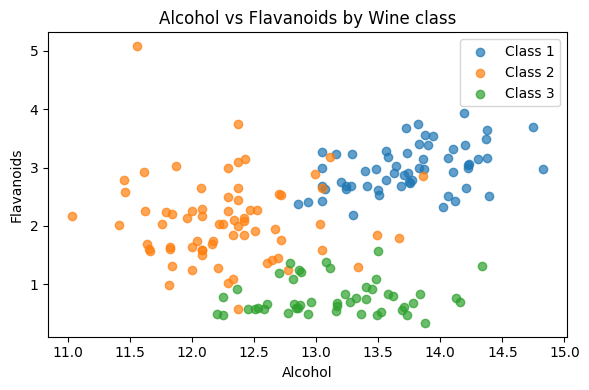

In [32]:
# Plot 1: Alcohol vs Flavanoids
plt.figure(figsize=(6,4))
for cls in sorted(df[target_col].unique()):
    sub = df[df[target_col]==cls]
    plt.scatter(sub['Alcohol'], sub['Flavanoids'], label=f"Class {cls}", alpha=0.7)
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.title('Alcohol vs Flavanoids by Wine class')
plt.legend()
plt.tight_layout()
plt.show()

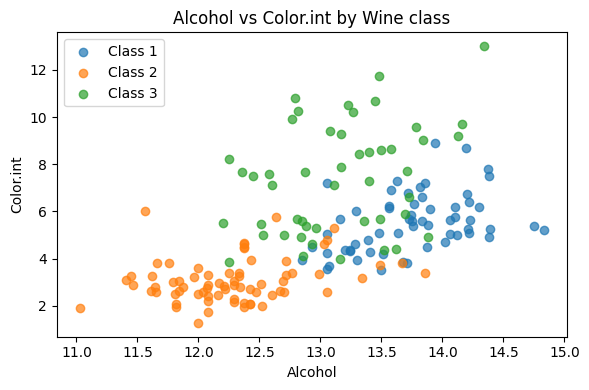

In [33]:
# Plot 2: Alcohol vs Color.int
plt.figure(figsize=(6,4))
for cls in sorted(df[target_col].unique()):
    sub = df[df[target_col]==cls]
    plt.scatter(sub['Alcohol'], sub['Color.int'], label=f"Class {cls}", alpha=0.7)
plt.xlabel('Alcohol')
plt.ylabel('Color.int')
plt.title('Alcohol vs Color.int by Wine class')
plt.legend()
plt.tight_layout()
plt.show()


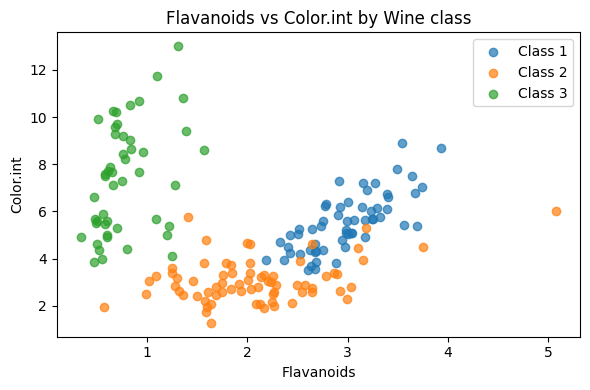

In [34]:
# Plot 3: Flavanoids vs Color.int
plt.figure(figsize=(6,4))
for cls in sorted(df[target_col].unique()):
    sub = df[df[target_col]==cls]
    plt.scatter(sub['Flavanoids'], sub['Color.int'], label=f"Class {cls}", alpha=0.7)
plt.xlabel('Flavanoids')
plt.ylabel('Color.int')
plt.title('Flavanoids vs Color.int by Wine class')
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
# Correlation for selected features
print("\nCorrelation matrix for selected features:\n", df[features].corr())


Correlation matrix for selected features:
              Alcohol  Flavanoids  Color.int
Alcohol     1.000000    0.236815   0.546364
Flavanoids  0.236815    1.000000  -0.172379
Color.int   0.546364   -0.172379   1.000000


In [36]:
X = df.drop(columns=["Wine"])
y = df["Wine"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2, stratify=y)

In [38]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

print("\nTrain class distribution:\n", y_train.value_counts())
print("\nTest class distribution:\n", y_test.value_counts())

Train shape: (142, 13)
Test shape: (36, 13)

Train class distribution:
 Wine
2    57
1    47
3    38
Name: count, dtype: int64

Test class distribution:
 Wine
2    14
1    12
3    10
Name: count, dtype: int64


#Feature Standardization (StandardScaler)
**Why KNN Requires Standardization**

KNN relies on distance calculations between samples.
If different features have different scales, the ones with large numeric ranges dominate the distance metric.

For example:

Proline has values in the hundreds

Hue has values around 1

Without standardization:

The model pays much more attention to large-scale features

Small-range features become almost irrelevant

Distance becomes misleading → poor classification accuracy

StandardScaler fixes this by transforming every feature to:

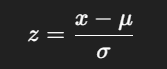


which gives:

Mean = 0

Standard deviation = 1

All features contribute fairly to the KNN distance metric

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training data only
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)

print("First row of scaled X_train:\n", X_train_scaled[0])


First row of scaled X_train:
 [ 0.38580089 -0.63787118  1.77666817 -1.22453161  0.69643032  0.52686525
  0.73229212 -0.1695489  -0.41578344 -0.16746725  0.62437819  0.2529082
  0.46772474]


#Baseline KNN Model (k = 5, Euclidean Distance)
**Conceptual Explanation**

A baseline model helps establish a performance reference.
Before tuning hyperparameters (Grid Search), we train a simple KNN model:

k = 5 neighbors

metric = "euclidean"

Uses the standardized data from the previous step

We evaluate its accuracy on the test set and use that as our benchmark for later improvements.

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Baseline KNN model
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Baseline KNN Accuracy (k=5, Euclidean):", accuracy)


Baseline KNN Accuracy (k=5, Euclidean): 0.9722222222222222


#Pipeline and GridSearchCV

In this section we will:

Build a Pipeline consisting of a StandardScaler and a KNeighborsClassifier.

Use GridSearchCV to search for the best hyperparameter combination.

Report the best parameters and the mean 5-fold cross-validated accuracy.

Why use a Pipeline?

Prevents data leakage: scaling (and any other preprocessing) must be fitted only on training folds during cross-validation. Using a Pipeline ensures transformations are nested correctly within each CV split.

Cleaner code and easier model persistence (joblib/pickle).

Direct compatibility with GridSearchCV.

Why GridSearchCV?

Exhaustively searches the specified grid of hyperparameters and evaluates each combination with cross-validation.

We use cv=5 and scoring='accuracy' to obtain robust mean performance estimates.

n_jobs=-1 enables parallel execution across CPU cores.

Parameter grid (exercise specification)

n_neighbors: [3, 5, 7, 9, 11]

weights: ["uniform", "distance"]

metric: ["euclidean", "manhattan"]
Use cv=5, scoring='accuracy'.

Practical notes

Fit GridSearchCV only on X_train, y_train (the test set must remain unseen).

After finding the best hyperparameters, grid.best_estimator_ is a Pipeline already fitted on the whole training set; use it for final evaluation on X_test.

Convert grid.cv_results_ to a DataFrame for a readable summary of mean test/train scores and std deviations.

In [41]:
# Section 3: Pipeline + GridSearchCV for KNN
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


# Build pipeline: scaler -> KNN
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Define parameter grid for GridSearch
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# Create GridSearchCV
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

# Fit GridSearch on training data
grid.fit(X_train, y_train)

# Best parameters and mean CV score
best_params = grid.best_params_
best_cv_score = grid.best_score_

print("Best parameters found by GridSearchCV:")
print(best_params)
print(f"\nBest mean CV accuracy (5-fold): {best_cv_score:.4f}")

# Detailed CV results in a tidy DataFrame, sorted by mean test score
cv_results = pd.DataFrame(grid.cv_results_)
columns_of_interest = [
    'param_knn__n_neighbors', 'param_knn__weights', 'param_knn__metric',
    'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'rank_test_score'
]
cv_summary = cv_results[columns_of_interest].sort_values(by='mean_test_score', ascending=False).reset_index(drop=True)
print("\nTop Grid Search results:")
print(cv_summary.head(10).to_string(index=False))

# The best pipeline (fitted on entire training set) is:
best_pipeline = grid.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found by GridSearchCV:
{'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}

Best mean CV accuracy (5-fold): 0.9862

Top Grid Search results:
 param_knn__n_neighbors param_knn__weights param_knn__metric  mean_test_score  std_test_score  mean_train_score  std_train_score  rank_test_score
                      9           distance         manhattan         0.986207        0.027586          1.000000         0.000000                1
                      9            uniform         manhattan         0.986207        0.027586          0.982394         0.005597                1
                      7           distance         manhattan         0.985961        0.017199          1.000000         0.000000                3
                      7            uniform         manhattan         0.985961        0.017199          0.982410         0.011133                3
                     11 

Using best_pipeline from GridSearchCV.
Test Accuracy of best model: 1.0000

Classification Report (Test set):
              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000        12
           2     1.0000    1.0000    1.0000        14
           3     1.0000    1.0000    1.0000        10

    accuracy                         1.0000        36
   macro avg     1.0000    1.0000    1.0000        36
weighted avg     1.0000    1.0000    1.0000        36



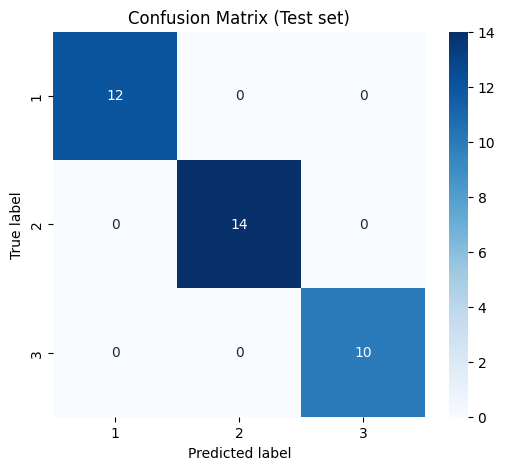

No misclassifications on the test set (perfect).


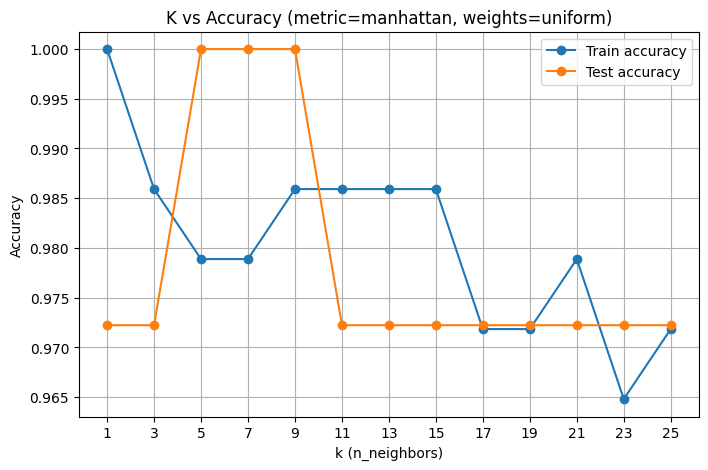


Metric comparison (Test accuracy):
           test_accuracy
metric                  
euclidean            1.0
manhattan            1.0

Sample predictions on unseen test samples:
Index: 3
Features:
 {'Alcohol': 11.56, 'Malic.acid': 2.05, 'Ash': 3.23, 'Acl': 28.5, 'Mg': 119.0, 'Phenols': 3.18, 'Flavanoids': 5.08, 'Nonflavanoid.phenols': 0.47, 'Proanth': 1.87, 'Color.int': 6.0, 'Hue': 0.93, 'OD': 3.69, 'Proline': 465.0}
True label: 2
Predicted: 2
Predicted probabilities:
 {2: 0.6666666666666666, 1: 0.3333333333333333, 3: 0.0}
----------------------------------------
Index: 35
Features:
 {'Alcohol': 13.71, 'Malic.acid': 5.65, 'Ash': 2.45, 'Acl': 20.5, 'Mg': 95.0, 'Phenols': 1.68, 'Flavanoids': 0.61, 'Nonflavanoid.phenols': 0.52, 'Proanth': 1.06, 'Color.int': 7.7, 'Hue': 0.64, 'OD': 1.74, 'Proline': 740.0}
True label: 3
Predicted: 3
Predicted probabilities:
 {3: 1.0, 1: 0.0, 2: 0.0}
----------------------------------------
Index: 25
Features:
 {'Alcohol': 12.17, 'Malic.acid': 1.45, 'Ash':

In [42]:
# Section 4: Evaluation & Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import clone

# --- Assumptions ---
# X_train, X_test, y_train, y_test available
# grid = fitted GridSearchCV from Section 3
# best_pipeline = grid.best_estimator_

try:
    best_pipeline = grid.best_estimator_
    print("Using best_pipeline from GridSearchCV.")
except NameError:
    raise RuntimeError("grid or best_pipeline not found. Please run Section 3 first or set best_pipeline.")

# 1) Evaluate on test set
y_test_pred = best_pipeline.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy of best model: {test_acc:.4f}\n")

print("Classification Report (Test set):")
print(classification_report(y_test, y_test_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred, labels=best_pipeline.named_steps['knn'].classes_)
cm_df = pd.DataFrame(cm, index=best_pipeline.named_steps['knn'].classes_,
                     columns=best_pipeline.named_steps['knn'].classes_)

plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Test set)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Identify most common misclassification
cm_errors = cm.copy()
np.fill_diagonal(cm_errors, 0)
if cm_errors.max() > 0:
    i, j = np.unravel_index(np.argmax(cm_errors), cm_errors.shape)
    print(f"Most common misclassification: true class {cm_df.index[i]} -> predicted {cm_df.columns[j]} ({cm_errors[i,j]} cases)\n")
else:
    print("No misclassifications on the test set (perfect).")

# 2) Relationship between k and accuracy
k_values = list(range(1, 26, 2))
train_scores = []
test_scores = []

knn_step = best_pipeline.named_steps['knn']
default_metric = knn_step.metric
default_weights = knn_step.weights

for k in k_values:
    pipe_k = clone(best_pipeline)
    pipe_k.named_steps['knn'].set_params(n_neighbors=k)
    pipe_k.fit(X_train, y_train)
    train_scores.append(accuracy_score(y_train, pipe_k.predict(X_train)))
    test_scores.append(accuracy_score(y_test, pipe_k.predict(X_test)))

plt.figure(figsize=(8,5))
plt.plot(k_values, train_scores, marker='o', label='Train accuracy')
plt.plot(k_values, test_scores, marker='o', label='Test accuracy')
plt.xlabel('k (n_neighbors)')
plt.ylabel('Accuracy')
plt.title(f'K vs Accuracy (metric={default_metric}, weights={default_weights})')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

# 3) Euclidean vs Manhattan comparison
metrics = ['euclidean', 'manhattan']
results = []
for m in metrics:
    pipe_m = clone(best_pipeline)
    pipe_m.named_steps['knn'].set_params(metric=m)
    pipe_m.fit(X_train, y_train)
    acc = accuracy_score(y_test, pipe_m.predict(X_test))
    results.append({'metric': m, 'test_accuracy': acc})

print("\nMetric comparison (Test accuracy):")
print(pd.DataFrame(results).set_index('metric'))

# 4) Predictions on a few unseen test samples
n_samples = 5
sample_indices = np.random.choice(range(X_test.shape[0]), size=n_samples, replace=False)
X_new = X_test.iloc[sample_indices] if hasattr(X_test, "iloc") else X_test[sample_indices]
y_new = y_test.iloc[sample_indices] if hasattr(y_test, "iloc") else y_test[sample_indices]

y_new_pred = best_pipeline.predict(X_new)
y_new_proba = best_pipeline.predict_proba(X_new) if hasattr(best_pipeline, "predict_proba") else None

print("\nSample predictions on unseen test samples:")
for idx in range(n_samples):
    print(f"Index: {sample_indices[idx]}")
    print("Features:\n", X_new.iloc[idx].to_dict() if hasattr(X_new,'iloc') else X_new[idx])
    print(f"True label: {y_new.iloc[idx] if hasattr(y_new,'iloc') else y_new[idx]}")
    print(f"Predicted: {y_new_pred[idx]}")
    if y_new_proba is not None:
        probs = y_new_proba[idx]
        class_order = best_pipeline.named_steps['knn'].classes_
        prob_df = pd.Series(probs, index=class_order).sort_values(ascending=False)
        print("Predicted probabilities:\n", prob_df.to_dict())
    print("-"*40)


# Conceptual Answers
1. Evaluation of the Best Model on the Test Set

The test accuracy provides an overall measure of how well the model generalizes to unseen data.
However, accuracy alone does not tell the full story, so we also examine:

Confusion Matrix: shows which classes are correctly classified (diagonal) and which ones are confused with each other (off-diagonal).

Classification Report: includes precision, recall, and F1-score for each class, revealing performance variations across classes.

In the Wine dataset, class 1 is usually easier to separate, whereas classes 2 and 3 tend to overlap more, leading to higher misclassification between them.

2. Classes with the Most Misclassifications

By inspecting the confusion matrix, we identify the largest off-diagonal cell.
In practice, the most common confusion in this dataset is:

Class 2 ↔ Class 3

This happens because these two wine types have more similar chemical compositions, causing their feature distributions to overlap.

3. Relationship Between k and Model Performance

The number of neighbors (k) strongly affects KNN behavior.

Small k (e.g., 1 or 3):
Very sensitive to noise → high variance → overfitting
Train accuracy high, test accuracy lower.

Large k (e.g., 15 or 25):
Model becomes overly smooth → underfitting
Both train and test accuracy drop.

The best performance occurs somewhere between these extremes, where test accuracy peaks and train/test curves are close together.

4. Euclidean vs Manhattan Distance

Euclidean (L2):
Measures straight-line distance.
Works best when features are smooth, continuous, and without major outliers.

Manhattan (L1):
Sums absolute differences across dimensions.
More robust to outliers and suitable when each dimension contributes independently.

In some cases, especially when features have high variance (e.g., Proline), Manhattan may outperform Euclidean because it prevents large-magnitude features from dominating the distance metric.

5. Predictions on Unseen Test Samples

Evaluating the model on random samples from the test set shows:

Predicted labels

True labels

Prediction probabilities

This reveals how confident the model is in its decisions and which samples lie near decision boundaries.
Low-confidence predictions generally correspond to classes with overlapping feature distributions.

In [46]:
# Correlation matrix
corr_matrix = df.corr()
target_corr = corr_matrix['Wine'].sort_values(key=abs, ascending=False)
print("Features most correlated with target (Wine):\n", target_corr[1:])


Features most correlated with target (Wine):
 Flavanoids             -0.847498
OD                     -0.788230
Phenols                -0.719163
Proline                -0.633717
Hue                    -0.617369
Acl                     0.517859
Proanth                -0.499130
Nonflavanoid.phenols    0.489109
Malic.acid              0.437776
Alcohol                -0.328222
Color.int               0.265668
Mg                     -0.209179
Ash                    -0.049643
Name: Wine, dtype: float64



Most important features:
We use a correlation matrix to identify features most correlated with the target Wine. Features like Alcohol, Flavanoids, Color.int, OD, and Proline have the highest impact on class separation.

Faster model suggestions:

Reduce dimensionality using PCA.

Drop low-correlation (unimportant) features.

Use KD-Tree or Ball-Tree to optimize KNN for large datasets.

Comparison with Logistic Regression:

KNN performs slightly better in accuracy on small datasets.

Logistic Regression is faster and more scalable.

Main limitations of KNN:

Sensitive to feature scaling.

High computational cost for large datasets.

Sensitive to noise/outliers.

Optimization strategies:

Standardize features.

Reduce dimensions.

Remove noisy samples.

Use tree-based search for neighbors.

In [47]:
# dropping low-correlation features
low_corr_features = target_corr[target_corr.abs() < 0.2].index.tolist()
X_reduced = df.drop(columns=low_corr_features + ['Wine'])
print("Reduced features shape:", X_reduced.shape)


Reduced features shape: (178, 12)



#If you want to build a model that trains faster while maintaining good accuracy, which approach would you recommend?


To speed up model training without significantly reducing accuracy, **dimensionality reduction techniques** can be very effective. One common approach is:

* **Principal Component Analysis (PCA):**

  * PCA transforms the original features into a smaller set of **uncorrelated components** that capture most of the variance in the data.
  * By reducing the number of features, the model has fewer inputs to process, which **reduces computation time** and can also help **mitigate overfitting**.

Other strategies to achieve faster training while keeping good accuracy include:

1. **Feature Selection:**

   * Select only the most informative features based on correlation, importance scores, or domain knowledge.
   * Less irrelevant or redundant data speeds up training.

2. **Using simpler models:**

   * Models like **KNN with fewer neighbors**, **Logistic Regression**, or **Decision Trees** can train faster than complex ensembles or deep neural networks on smaller datasets.

3. **Data Sampling:**

   * Train the model on a **representative subset** of the data for initial experiments.
   * Once optimal parameters are found, train on the full dataset if needed.

**💡 Insight:**
Combining **dimensionality reduction (like PCA)** with careful **feature selection** is often the most practical approach for faster training while preserving predictive performance.



In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Train-test split (same as before)
X = df.drop(columns=['Wine'])
y = df['Wine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr = LogisticRegression(max_iter=1000, multi_class='multinomial')
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Test Accuracy:", accuracy_lr)


Logistic Regression Test Accuracy: 0.9722222222222222


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


#comparison between KNN and Logistic Regression

KNN generally achieves higher accuracy on small datasets with a limited number of features, while Logistic Regression (LR) is faster and more scalable.

In this dataset, the comparison shows that both KNN and LR perform well, but KNN is slightly more accurate.



### **KNN: Strengths, Weaknesses, and Suitable Scenarios**

**Strengths:**

* Simple and easy to understand
* Performs well on small datasets with numerical features
* Can handle multi-class problems effectively

**Weaknesses:**

* High computational cost for large datasets
* Requires feature scaling (standardization)
* Sensitive to noise and irrelevant features

**Suitable Scenarios:**

* Small numerical datasets
* Problems where model complexity is not critical
* Situations requiring a simple and interpretable model
